In [4]:
import pandas as pd
from pandas import DataFrame

In [5]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [6]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [7]:
import seaborn as sbn
import matplotlib.pyplot as plt

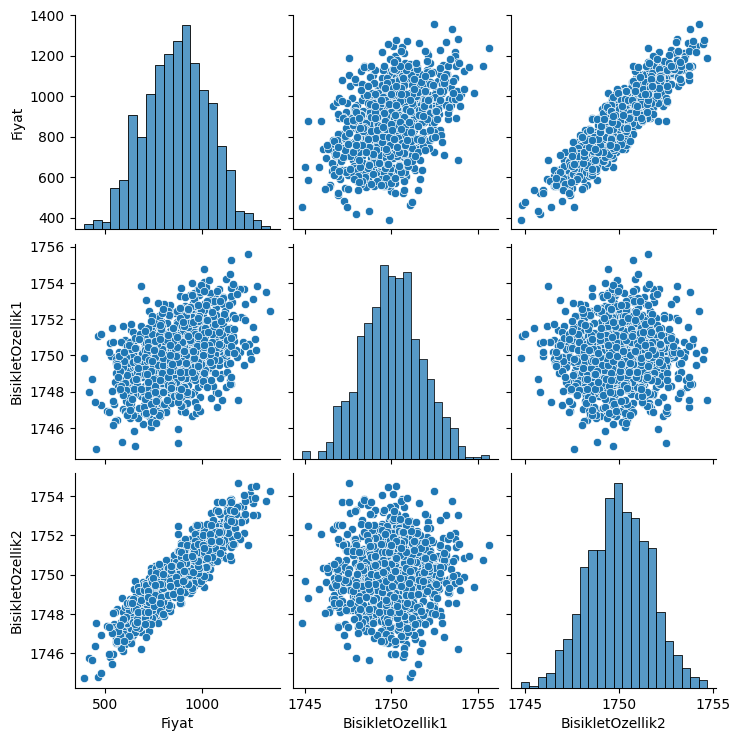

In [8]:
sbn.pairplot(dataFrame)

veriyi test/train olarak ikiye ayırma

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train_test_split

In [11]:
# y = wx+b
# y -> label
y = dataFrame["Fiyat"].values

# x -> Feature(Özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [12]:
x_train.shape

(670, 2)

In [13]:
x_test.shape

(330, 2)

In [14]:
y_train.shape

(670,)

In [15]:
y_test.shape

(330,)

# SCALİNG

In [16]:
from sklearn.preprocessing import MinMaxScaler


In [17]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [18]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) ## VERİLER 0 İLE 1 ARASINA GETİRİLDİ

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss='mse')

In [ ]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 796200.3125   
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 793961.1875 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 791073.3750 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 780715.3750 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 789793.2500 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 796912.9375 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790085.1250 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 787097.8750 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 807896.3125 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 800666.7500 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 795438.7500 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 794102.3750 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 795889.0000 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [ ]:
loss = model.history.history["loss"]

<Axes: >

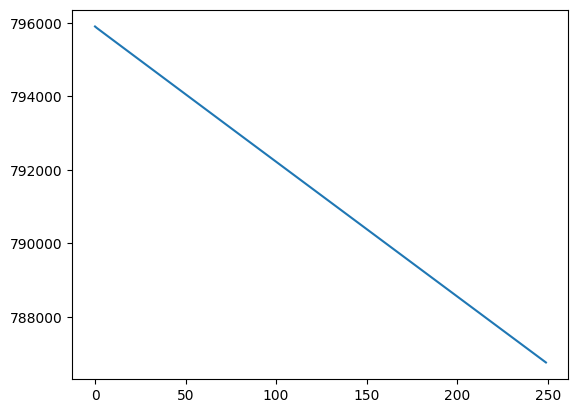

In [ ]:
sbn.lineplot(x= range(len(loss)),y = loss)

In [ ]:
trainLoss = model.evaluate(x_train,y_train,verbose=0) # Verbose -> Ayrıntı

In [ ]:
testLoss = model.evaluate(x_test,y_test,verbose=0) # evaluate -> değerlendirmek

In [ ]:
trainLoss

786738.5625

In [ ]:
testLoss

764289.0

In [ ]:
testTahminleri = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
testTahminleri.shape

(330, 1)

In [ ]:
tahminDf = pd.DataFrame(y_test, columns=["Gerçek Y "])

In [ ]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
testTahminleri = pd.Series(testTahminleri.reshape(len(testTahminleri),1))

ValueError: Data must be 1-dimensional, got ndarray of shape (330, 1) instead

In [ ]:
testTahminleri

0      879.159485
1      877.218872
2      878.273010
3      878.549744
4      878.604980
          ...    
325    878.851501
326    878.071960
327    877.784485
328    879.484924
329    878.183655
Length: 330, dtype: float32

In [ ]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [ ]:
tahminDf

,Gerçek Y,0
0,1081.652164,879.159485
1,622.675990,877.218872
2,889.356810,878.273010
3,902.826733,878.549744
4,897.662404,878.604980
...,...,...
325,1028.438035,878.851501
326,789.934950,878.071960
327,758.490486,877.784485
328,1172.871659,879.484924


In [ ]:
tahminDf.columns = ["Gerçek Y","Tahmin Y"]

In [ ]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,879.159485
1,622.675990,877.218872
2,889.356810,878.273010
3,902.826733,878.549744
4,897.662404,878.604980
...,...,...
325,1028.438035,878.851501
326,789.934950,878.071960
327,758.490486,877.784485
328,1172.871659,879.484924


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

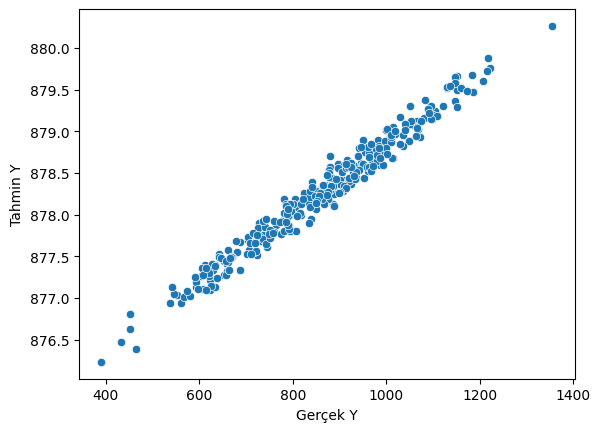

In [ ]:
sbn.scatterplot(data = tahminDf,x = "Gerçek Y",y = "Tahmin Y")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"]) # ORTALAMA MUTLAK HATA

np.float64(130.8786457176302)

In [ ]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"]) # ORTALAMA KARE HATA  

np.float64(27011.75540463434)

In [ ]:
dataFrame.describe()

NameError: name 'dataFrame' is not defined

In [ ]:
yeniBisikletOzellikleri = [[1760,1755]]

In [ ]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [ ]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[5.245123]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("bisiklet_modeli.keras")

In [ ]:
sonradanCagirilanModel = load_model("bisiklet_modeli.keras")

In [ ]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[5.245123]], dtype=float32)